In [1]:
import pandas as pd
import math

In [2]:
titanic_data = pd.read_csv("train.csv")

In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
'''
Calculate the survival rate for each passenger class, gender, and age group.
Create a pivot table to compare the survival rate by passenger class and gender.
Plot a histogram of passenger ages to visualize the age distribution of the passengers.
Use the fillna() function to replace missing age values with the median age.
Plot a scatter plot to explore the relationship between age and fare, and color-code the points by survival status.

'''

'\nCalculate the survival rate for each passenger class, gender, and age group.\nCreate a pivot table to compare the survival rate by passenger class and gender.\nPlot a histogram of passenger ages to visualize the age distribution of the passengers.\nUse the fillna() function to replace missing age values with the median age.\nPlot a scatter plot to explore the relationship between age and fare, and color-code the points by survival status.\n'

In [5]:
total_person = len(titanic_data['PassengerId'])
survived_person = (titanic_data['Survived'] == 1).sum()
death = (titanic_data['Survived']== 0).sum()


survived_rate = (survived_person / total_person) * 100
# 549 person death
# 342 person survived  
print(survived_person)
print(death)
print(survived_rate)

342
549
38.38383838383838


In [6]:
data = titanic_data.groupby('Sex')['Survived'].sum()
total_female = (titanic_data['Sex'] == "female").sum()
total_male = (titanic_data['Sex'] == 'male').sum()

# total = 891
# total female = 314 
# total male = 577 

# survived female  = 233
# survived male = 109 

survived_rate_female = (data[0] / (titanic_data['Sex'] == 'female').sum() ) * 100 
survived_rate_male = (data[1] / (titanic_data['Sex'] == 'male').sum() ) * 100

print("male survived rate : ",survived_rate_male)
print("female survived rate : ",survived_rate_female) 
print("overall survival rate : ",survived_rate)

male survived rate :  18.890814558058924
female survived rate :  74.20382165605095
overall survival rate :  38.38383838383838


In [7]:
titanic_data.Age.isnull().sum()
median_age = titanic_data['Age'].median() 
median_age
titanic_data['Age'] = titanic_data['Age'].fillna(math.floor(median_age))

In [8]:
age_1to40 = titanic_data.loc[(titanic_data['Age'] < 41 ) & ( titanic_data['Age'] > 0 )]
age_40to80 = titanic_data.loc[(titanic_data['Age'] <81 )& (titanic_data['Age'] > 40)]
(age_1to40['Survived'] == 1).sum()
(age_40to80['Survived'] == 1).sum()

# survived in 1 to 40 age = 287 
# survived in 40 to 80 age = 55

55

In [9]:
pclass = titanic_data.groupby('Pclass')['Survived'].sum()
pclass

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [10]:
survival_rates = titanic_data.groupby(["Pclass", "Sex", pd.cut(titanic_data["Age"], [0, 18, 40, 80])])["Survived"].mean()
survival_rates

Pclass  Sex     Age     
1       female  (0, 18]     0.909091
                (18, 40]    0.982456
                (40, 80]    0.961538
        male    (0, 18]     0.800000
                (18, 40]    0.402985
                (40, 80]    0.280000
2       female  (0, 18]     1.000000
                (18, 40]    0.918367
                (40, 80]    0.846154
        male    (0, 18]     0.600000
                (18, 40]    0.083333
                (40, 80]    0.095238
3       female  (0, 18]     0.511628
                (18, 40]    0.532609
                (40, 80]    0.111111
        male    (0, 18]     0.215686
                (18, 40]    0.128302
                (40, 80]    0.064516
Name: Survived, dtype: float64

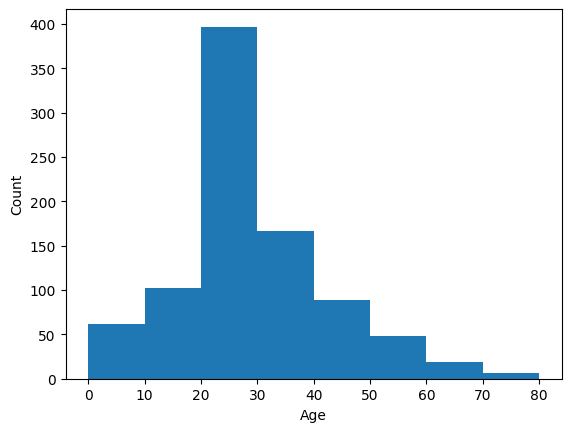

In [15]:
import matplotlib.pyplot as plt

plt.hist(titanic_data["Age"].dropna(), bins=[0,10,20,30,40,50,60,70,80])
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


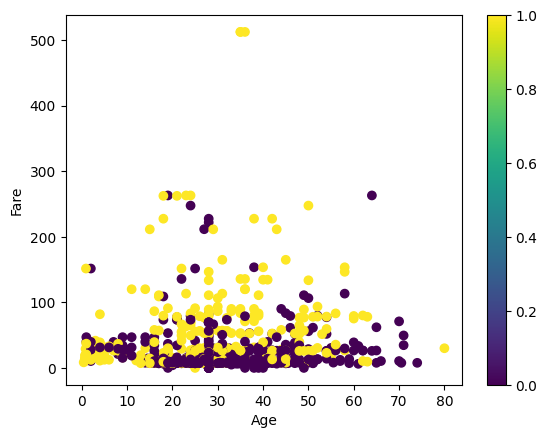

In [22]:
plt.scatter(titanic_data['Age'], titanic_data['Fare'], c=titanic_data['Survived'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar()
plt.show()